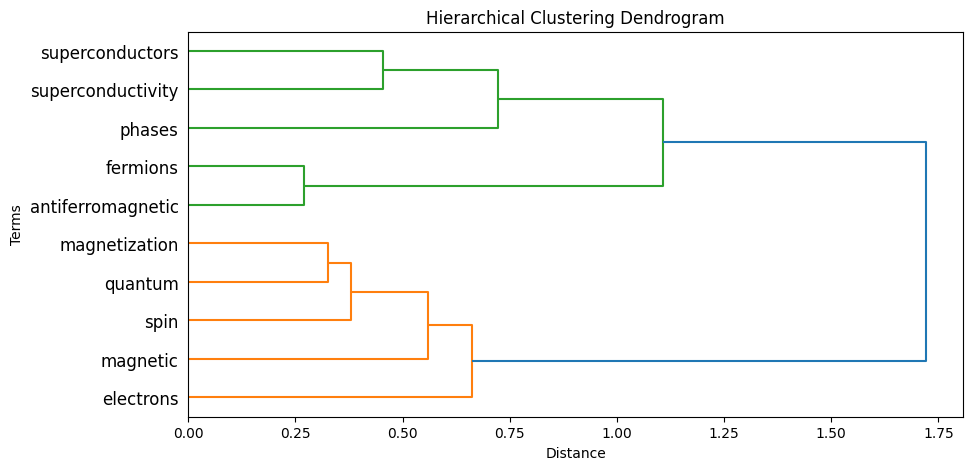

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Dummy data (replace with actual features if available)
# For demonstration purposes, we use random data'
data = np.random.rand(len(terms), 5)

# Perform hierarchical clustering
Z = linkage(data, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z, labels=terms, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Terms')
plt.show()


In [2]:
!pip install transformers
!pip install torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 3.7 MB/s eta 0:00:00


In [3]:
import torch
from transformers import BertTokenizer, BertModel


In [4]:
words = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

In [5]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [6]:
def get_bert_embeddings(text):
  inputs=tokenizer(text,return_tensors='pt',padding=True,truncation=True,max_length=512)
  with torch.no_grad():
    outputs=model(**inputs)
    embeddings=outputs.last_hidden_state[:,0,:].numpy()
    return embeddings


In [7]:
embeddings={}
for word in words:
  embeddings[word]=get_bert_embeddings(word)

for word,embedding in embeddings.items():
  print(f"{word}: {embeddings}")

Streaming output truncated to the last 5000 lines.
         2.16383375e-02, -2.10300907e-01, -2.61184263e+00,
         2.23406464e-01,  2.36355007e-01, -4.96810973e-01,
         2.71766365e-01, -2.34063372e-01,  4.67883825e-01,
        -2.01949418e-01, -8.06375980e-01,  4.58681732e-01,
        -1.36321282e-03, -6.00378960e-02, -2.64890820e-01,
        -1.37570754e-01,  3.37266684e-01,  3.22109312e-01,
         7.33274043e-01,  2.32935622e-02,  2.62381464e-01,
         3.50295961e-01,  2.73742229e-01,  2.85750300e-01,
        -4.47211862e-01, -2.11477168e-02,  4.33935672e-02,
        -3.12637091e-02, -1.48945123e-01,  9.07751322e-02,
        -1.84915304e-01, -2.39692498e-02, -5.45493722e-01,
         4.25009936e-01,  1.01637833e-01,  2.59787589e-01,
        -1.21891864e-01, -3.53242993e-01,  7.55884275e-02,
         2.54146844e-01,  8.40665996e-01,  3.75331342e-01,
        -4.19544578e-01,  7.92487025e-01,  4.94160980e-01,
         6.46631777e-01,  2.80457109e-01,  2.20052600e-01,
     

In [8]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=3386afaf3ad1aea04202620740a1e4644b47e9b128d0caa2aad729682a86cfc2
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [9]:
import umap

In [10]:
import matplotlib.pyplot as plt

In [13]:
embeddings_array = torch.stack([torch.tensor(embedding) for embedding in embeddings]).numpy()

TypeError: new(): invalid data type 'str'

In [15]:
embeddings = []
for word in words:
    embeddings.append(get_bert_embeddings(word)[0])

In [17]:
embeddings_array=np.stack(embeddings)

In [18]:
reducer=umap.UMAP(n_components=5)
embeddings_umap=reducer.fit_transform(embeddings_array)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2433: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [ ]:
for i,words in enumerate(words):
  print(f"{words}: {embeddings_umap[i]}")

antiferromagnetic: [-8.026914   6.031166  12.489943   3.8546972 -8.45528  ]
quantum: [-8.758095   8.068407  11.903659   4.8430104 -8.42855  ]
spin: [-8.993384   8.559201  11.762827   4.4870114 -7.8705277]
superconductivity: [-8.481078   5.685634  12.354901   4.3492618 -8.581041 ]
magnetic: [-8.930642   7.933991  11.610495   4.0992045 -8.267933 ]
electrons: [-9.339195  8.377756 12.108652  4.247772 -8.393416]
fermions: [-8.246277   6.204357  11.811256   4.1640897 -8.0995   ]
superconductors: [-7.837286   5.5670447 12.117019   4.2788777 -8.164781 ]
magnetization: [-8.472196   6.5525374 12.359452   4.443708  -8.671245 ]
phases: [-8.723903  8.272743 12.537947  4.236339 -8.01852 ]


In [ ]:
Z = linkage(embeddings_umap, method='ward')

In [ ]:
print(Z)

[[ 2.          5.          0.77637009  2.        ]
 [ 0.          3.          0.77736978  2.        ]
 [ 7.         11.          0.82298383  3.        ]
 [ 1.          4.          0.84429292  2.        ]
 [10.         13.          0.90712002  4.        ]
 [ 6.         12.          0.91938181  4.        ]
 [ 9.         14.          1.0130508   5.        ]
 [ 8.         15.          1.12793089  5.        ]
 [16.         17.          5.31933885 10.        ]]


In [ ]:
def print_clusters(Z, terms, threshold):
    clusters = {}
    current_label = len(Z) + 1  # Starting label for clusters

    for i, (cluster1, cluster2, distance, count) in enumerate(Z):
        # If the distance is above the threshold, break
        if distance > threshold:
            break

        # If both clusters are individual words
        if cluster1 < len(Z) and cluster2 < len(Z):
            clusters[current_label] = [terms[int(cluster1)], terms[int(cluster2)]]
            current_label += 1
        # If cluster1 is an individual word and cluster2 is a merged cluster
        elif cluster1 < len(Z):
            clusters[current_label] = [terms[int(cluster1)]] + clusters[int(cluster2)]
            current_label += 1
        # If cluster2 is an individual word and cluster1 is a merged cluster
        elif cluster2 < len(Z):
            clusters[current_label] = clusters[int(cluster1)] + [terms[int(cluster2)]]
            current_label += 1
        # If both clusters are merged clusters
        else:
            clusters[current_label] = clusters[int(cluster1)] + clusters[int(cluster2)]
            current_label += 1

    for label, cluster in clusters.items():
        print(f"{cluster} -> {label}")

# Given Z matrix
Z = [
    [ 2.,  5.,  0.77637009,  2.],
    [ 0.,  3.,  0.77736978,  2.],
    [ 7., 11.,  0.82298383,  3.],
    [ 1.,  4.,  0.84429292,  2.],
    [10., 13.,  0.90712002,  4.],
    [ 6., 12.,  0.91938181,  4.],
    [ 9., 14.,  1.0130508 ,  5.],
    [ 8., 15.,  1.12793089,  5.],
    [16., 17.,  5.31933885, 10.]
]

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Set a threshold distance
threshold = 1

# Print clusters based on the threshold
print_clusters(Z, terms, threshold)


['spin', 'electrons'] -> 10
['antiferromagnetic', 'superconductivity'] -> 11
['superconductors', 'antiferromagnetic', 'superconductivity'] -> 12
['quantum', 'magnetic'] -> 13
['spin', 'electrons', 'quantum', 'magnetic'] -> 14
['fermions', 'superconductors', 'antiferromagnetic', 'superconductivity'] -> 15


In [ ]:
def print_clusters(Z, terms, threshold):
    clusters = {}
    current_label = len(Z) + 1  # Starting label for clusters

    for i, (cluster1, cluster2, distance, count) in enumerate(Z):
        # If the distance is above the threshold, break
        if distance > threshold:
            break

        # Assign labels to individual words if not already assigned
        if cluster1 < len(terms) and cluster1 not in clusters:
            clusters[int(cluster1)] = [terms[int(cluster1)]]
        if cluster2 < len(terms) and cluster2 not in clusters:
            clusters[int(cluster2)] = [terms[int(cluster2)]]

        # Merge clusters
        if cluster1 < len(Z) and cluster2 < len(Z):
            clusters[current_label] = [terms[int(cluster1)], terms[int(cluster2)]]
            current_label += 1
        elif cluster1 < len(Z):
            clusters[current_label] = [terms[int(cluster1)]] + clusters[int(cluster2)]
            current_label += 1
        elif cluster2 < len(Z):
            clusters[current_label] = clusters[int(cluster1)] + [terms[int(cluster2)]]
            current_label += 1
        else:
            clusters[current_label] = clusters[int(cluster1)] + clusters[int(cluster2)]
            current_label += 1

    for label, cluster in clusters.items():
        print(f"{cluster} -> {label}")

# Given Z matrix
Z = [
    [ 2.,  5.,  0.77637009,  2.],
    [ 0.,  3.,  0.77736978,  2.],
    [ 7., 11.,  0.82298383,  3.],
    [ 1.,  4.,  0.84429292,  2.],
    [10., 13.,  0.90712002,  4.],
    [ 6., 12.,  0.91938181,  4.],
    [ 9., 14.,  1.0130508 ,  5.],
    [ 8., 15.,  1.12793089,  5.],
    [16., 17.,  5.31933885, 10.]
]

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Set a threshold distance
threshold = 2

# Print clusters based on the threshold
print_clusters(Z, terms, threshold)


['spin'] -> 2
['electrons'] -> 5
['spin', 'electrons'] -> 10
['antiferromagnetic'] -> 0
['superconductivity'] -> 3
['antiferromagnetic', 'superconductivity'] -> 11
['superconductors'] -> 7
['superconductors', 'antiferromagnetic', 'superconductivity'] -> 12
['quantum'] -> 1
['magnetic'] -> 4
['quantum', 'magnetic'] -> 13
['spin', 'electrons', 'quantum', 'magnetic'] -> 14
['fermions'] -> 6
['fermions', 'superconductors', 'antiferromagnetic', 'superconductivity'] -> 15
['phases'] -> 9
['phases', 'spin', 'electrons', 'quantum', 'magnetic'] -> 16
['magnetization'] -> 8
['magnetization', 'fermions', 'superconductors', 'antiferromagnetic', 'superconductivity'] -> 17


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Initialize BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Calculate embeddings for terms
term_embeddings = model.encode(terms, convert_to_tensor=True)

# Move embeddings to CPU memory
term_embeddings = term_embeddings.cpu()

# Compute pairwise cosine similarity
cos_sim = util.pytorch_cos_sim(term_embeddings, term_embeddings).numpy()

# Calculate average similarity for each term
avg_similarity = np.mean(cos_sim, axis=1)

# Find the term with the highest average similarity
most_similar_index = np.argmax(avg_similarity)
most_similar_term = terms[most_similar_index]

print(f"The term most similar to the rest is: {most_similar_term}")


The term most similar to the rest is: superconductivity


In [ ]:
from sentence_transformers import SentenceTransformer, util
import numpy as np

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Initialize BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Calculate embeddings for terms
term_embeddings = model.encode(terms, convert_to_tensor=True)

# Move embeddings to CPU memory
term_embeddings = term_embeddings.cpu()

# Compute pairwise cosine similarity
cos_sim = util.pytorch_cos_sim(term_embeddings, term_embeddings).numpy()

# Calculate average similarity for each term
avg_similarity = np.mean(cos_sim, axis=1)

# Create a list of (term, similarity) pairs
term_similarity_pairs = [(term, sim) for term, sim in zip(terms, avg_similarity)]

# Sort terms based on their average similarity in descending order
sorted_terms = sorted(term_similarity_pairs, key=lambda x: x[1], reverse=True)

# Assign a value to each term based on its rank
term_values = {term: rank + 1 for rank, (term, _) in enumerate(sorted_terms)}

print("Ranked terms based on similarity and their associated values:")
for term, value in term_values.items():
    print(f"{term}: {value}")


Ranked terms based on similarity and their associated values:
superconductivity: 1
superconductors: 2
quantum: 3
magnetic: 4
fermions: 5
electrons: 6
magnetization: 7
antiferromagnetic: 8
spin: 9
phases: 10


In [ ]:
import numpy as np
from sentence_transformers import SentenceTransformer, util

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Given Z matrix
Z = [
    [ 2.,  5.,  0.77637009,  2.],
    [ 0.,  3.,  0.77736978,  2.],
    [ 7., 11.,  0.82298383,  3.],
    [ 1.,  4.,  0.84429292,  2.],
    [10., 13.,  0.90712002,  4.],
    [ 6., 12.,  0.91938181,  4.],
    [ 9., 14.,  1.0130508 ,  5.],
    [ 8., 15.,  1.12793089,  5.],
    [16., 17.,  5.31933885, 10.]
]

# Initialize BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Calculate embeddings for terms
term_embeddings = model.encode(terms, convert_to_tensor=True)

# Move embeddings to CPU memory
term_embeddings = term_embeddings.cpu()

# Compute pairwise cosine similarity
cos_sim = util.pytorch_cos_sim(term_embeddings, term_embeddings).numpy()

# Calculate average similarity for each term
avg_similarity = np.mean(cos_sim, axis=1)

# Create a list of (term, similarity) pairs
term_similarity_pairs = [(term, sim) for term, sim in zip(terms, avg_similarity)]

# Sort terms based on their average similarity in descending order
sorted_terms = sorted(term_similarity_pairs, key=lambda x: x[1], reverse=True)

# Assign a value to each term based on its rank
term_values = {term: rank + 1 for rank, (term, _) in enumerate(sorted_terms)}

# Create hierarchical clusters based on Z matrix
def create_clusters(Z, terms, threshold):
    clusters = {}
    current_label = len(Z) + 1

    for i, (cluster1, cluster2, distance, count) in enumerate(Z):
        if distance > threshold:
            break

        if cluster1 < len(terms) and cluster1 not in clusters:
            clusters[int(cluster1)] = [terms[int(cluster1)]]
        if cluster2 < len(terms) and cluster2 not in clusters:
            clusters[int(cluster2)] = [terms[int(cluster2)]]

        if cluster1 < len(Z) and cluster2 < len(Z):
            clusters[current_label] = [terms[int(cluster1)], terms[int(cluster2)]]
            current_label += 1
        elif cluster1 < len(Z):
            clusters[current_label] = [terms[int(cluster1)]] + clusters[int(cluster2)]
            current_label += 1
        elif cluster2 < len(Z):
            clusters[current_label] = clusters[int(cluster1)] + [terms[int(cluster2)]]
            current_label += 1
        else:
            clusters[current_label] = clusters[int(cluster1)] + clusters[int(cluster2)]
            current_label += 1

    return clusters

# Define threshold for hierarchical clustering
threshold = 2

# Create hierarchical clusters
clusters = create_clusters(Z, terms, threshold)

# Output best-ranked value from each cluster
for label, cluster in clusters.items():
    cluster_values = {term: term_values[term] for term in cluster if term in term_values}
    best_term = max(cluster_values, key=cluster_values.get)
    print(f"Cluster {label}: {best_term} ({cluster_values[best_term]})")


Cluster 2: spin (9)
Cluster 5: electrons (6)
Cluster 10: spin (9)
Cluster 0: antiferromagnetic (8)
Cluster 3: superconductivity (1)
Cluster 11: antiferromagnetic (8)
Cluster 7: superconductors (2)
Cluster 12: antiferromagnetic (8)
Cluster 1: quantum (3)
Cluster 4: magnetic (4)
Cluster 13: magnetic (4)
Cluster 14: spin (9)
Cluster 6: fermions (5)
Cluster 15: antiferromagnetic (8)
Cluster 9: phases (10)
Cluster 16: phases (10)
Cluster 8: magnetization (7)
Cluster 17: antiferromagnetic (8)


In [ ]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 15.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039291 sha256=574868713a295d3c912a9dd8be99c27a6c682d464ce8e719004b70b9e0a2c2b2
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.9
    Uninstalling Cython-3.0.9:
      Successfully uninstalled Cython-3.0.9


In [ ]:
from sentence_transformers import SentenceTransformer
import numpy as np
import hdbscan

# List of terms
terms = [
    'antiferromagnetic', 'quantum', 'spin', 'superconductivity',
    'magnetic', 'electrons', 'fermions', 'superconductors',
    'magnetization', 'phases'
]

# Initialize BERT model
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Calculate embeddings for terms
term_embeddings = model.encode(terms, convert_to_tensor=True).cpu().numpy()

# Perform clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=3)
clusters = clusterer.fit_predict(term_embeddings)

# Organize terms into clusters
clustered_terms = {}
for term, cluster_label in zip(terms, clusters):
    if cluster_label not in clustered_terms:
        clustered_terms[cluster_label] = []
    clustered_terms[cluster_label].append(term)

# Output best-ranked term from each cluster
for cluster_label, cluster in clustered_terms.items():
    cluster_embeddings = term_embeddings[clusters == cluster_label]
    avg_similarity = np.mean(util.pytorch_cos_sim(cluster_embeddings, cluster_embeddings).cpu().numpy(), axis=1)
    ranked_terms = [term for _, term in sorted(zip(avg_similarity, cluster), reverse=True)]

    best_term = ranked_terms[0]
    print(f"Cluster {cluster_label}: {best_term}")


Cluster -1: superconductivity
